<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [123]:
# Read CSV
wine_csv = pd.read_csv('/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Labs/DATA/winequality_merged.csv')
wine_csv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [124]:
wine_csv.shape

(6497, 13)

In [125]:
wine_csv.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#### 1.2 Explore Data (Exploratory Data Analysis)

In [126]:
# ANSWER
wine_csv.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [127]:
wine_csv.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

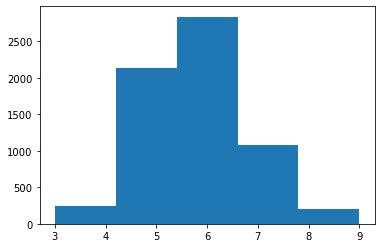

In [128]:
_=plt.hist(wine_csv['quality'], bins=5)

<AxesSubplot:>

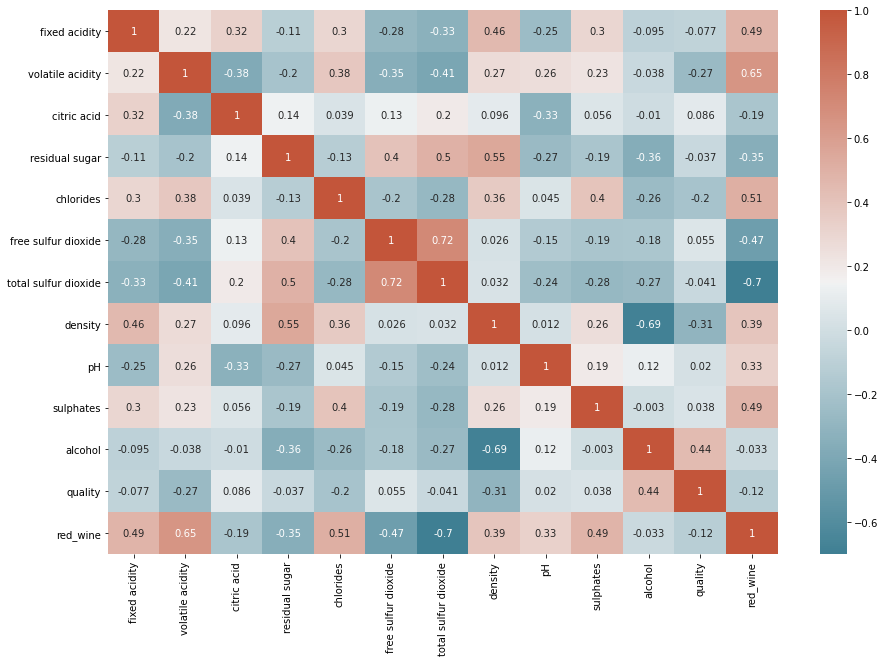

In [129]:
corr = wine_csv.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### 2. Set Target Variable

Create a target variable for wine quality.

In [130]:
# Target Variable
y=wine_csv['quality']
y.shape

(6497,)

In [131]:
wine_csv['red_wine'].value_counts()

0    4898
1    1599
Name: red_wine, dtype: int64

In [132]:
wine_csv.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [133]:
# ANSWER
#Predictors accroding the correlation matrix
#'volatile acidity','red_wine','residual sugar','density','total sulfur dioxide','chlorides','pH','sulphates','alcohol'

In [134]:
#Predictor variable - total sulfur dioxide
X=wine_csv[['total sulfur dioxide', 'red_wine', 'residual sugar', 'density', 'total sulfur dioxide','chlorides','pH','sulphates','alcohol' ]]
X,X.shape

(      total sulfur dioxide  red_wine  residual sugar  density  \
 0                     34.0         1             1.9  0.99780   
 1                     67.0         1             2.6  0.99680   
 2                     54.0         1             2.3  0.99700   
 3                     60.0         1             1.9  0.99800   
 4                     34.0         1             1.9  0.99780   
 ...                    ...       ...             ...      ...   
 6492                  92.0         0             1.6  0.99114   
 6493                 168.0         0             8.0  0.99490   
 6494                 111.0         0             1.2  0.99254   
 6495                 110.0         0             1.1  0.98869   
 6496                  98.0         0             0.8  0.98941   
 
       total sulfur dioxide  chlorides    pH  sulphates  alcohol  
 0                     34.0      0.076  3.51       0.56      9.4  
 1                     67.0      0.098  3.20       0.68      9.8  
 2   

### 4. Using Linear Regression Create a Model and Test Score

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [138]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4872, 9), (1625, 9), (4872,), (1625,))

In [139]:
# Create a model for Linear Regression
reg=LinearRegression()

# Fit the model with the Training data
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [140]:
# Calculate the score (R^2 for Regression) for Training Data
r2_train = r2_score(y_train, y_pred_train)

# Calculate the score (R^2 for Regression) for Testing Data
r2_test = r2_score(y_test, y_pred_test)

r2_train,r2_test

(0.24164625981149013, 0.2241162255618082)

### BONUS: Cross validation

In [159]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [188]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y.iloc[train,]
    y_test = y.iloc[test,]
    
    # Fit model with training set
    reg.fit(X_train,y_train)
    
    # Make predictions with training and test set
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(r2_score(y_train, y_pred_train))
    train_rmse.append(mean_squared_error(y_train, y_pred_train))
    test_scores.append(r2_score(y_test, y_pred_test))
    test_rmse.append(mean_squared_error(y_test, y_pred_test))
    

In [189]:
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'train_scores':train_scores, 'train_rmse':train_rmse, 'test_scores':test_scores, 'test_rmse':test_rmse})
metrics_df

,train_scores,train_rmse,test_scores,test_rmse
0,0.244260,0.578602,0.208227,0.593653
1,0.229925,0.591460,0.268381,0.541060
2,0.236343,0.573557,0.239457,0.613858
3,0.240544,0.583360,0.224988,0.573304
4,0.239032,0.577842,0.231604,0.595412


In [191]:
# Describe the metrics
metrics_df.describe()

,train_scores,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.238021,0.580964,0.234532,0.583457
std,0.005354,0.006821,0.022145,0.027712
min,0.229925,0.573557,0.208227,0.541060
25%,0.236343,0.577842,0.224988,0.573304
50%,0.239032,0.578602,0.231604,0.593653
75%,0.240544,0.583360,0.239457,0.595412
max,0.244260,0.591460,0.268381,0.613858


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

In [143]:
r2_test

0.2401501439478213

In [ ]:
#Selected 8 features. 

In [ ]:
#With 4 features the r2_test becomes 0.1536651969320466
#Score gets better if there are more features.

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



